<a href="https://colab.research.google.com/github/kanjamwingirwa/KPMG_AU_Virtual_Internship/blob/kanja/KPMG_Internship_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt
import warnings
warnings. filterwarnings("ignore")

In [2]:
#Let us begin by loading the datasets
kpmg_df = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final (1).xlsx')
kpmg_df.head(5)

,Unnamed: 0,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,KPMG Virtual Internship,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Sprocket Central Pty Ltd Data Set,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
transactions_df = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final (1).xlsx', sheet_name='Transactions')
transactions_df.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [5]:
transactions_df['Date'] = pd.to_datetime(transactions_df['transaction_date'])
transactions_df['Year'] = transactions_df['Date'].dt.year
transactions_df['Month'] = transactions_df['Date'].dt.month
transactions_df['Day']  = transactions_df['Date'].dt.day

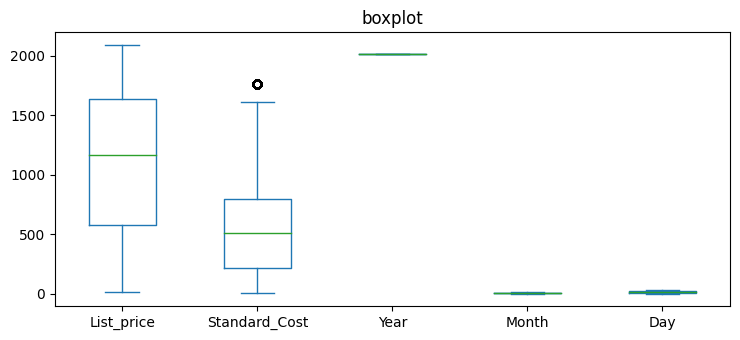

In [6]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"List_price": transactions_df['list_price'], 
                     "Standard_Cost": transactions_df['standard_cost'],
                     "Year": transactions_df['Year'],
                     "Month": transactions_df['Month'],
                     "Day":transactions_df['Day']})
# Plot the dataframe
#ax = data[['Box1', 'Box2']].plot(kind='box', title='boxplot')
ax = data[['List_price', 'Standard_Cost', 'Year', 'Month','Day']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

There is an outlier in standard cost

In [7]:
NewCustomerList_df = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final (1).xlsx', sheet_name='NewCustomerList')
NewCustomerList_df.head(5)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.99,1.2375,1.546875,1.314844,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.67,0.6700,0.837500,0.711875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.77,0.7700,0.770000,0.770000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,1.08,1.3500,1.350000,1.350000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.67,0.6700,0.837500,0.837500,4,4,1.703125


In [8]:
NewCustomerList_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

<Axes: xlabel='past_3_years_bike_related_purchases'>

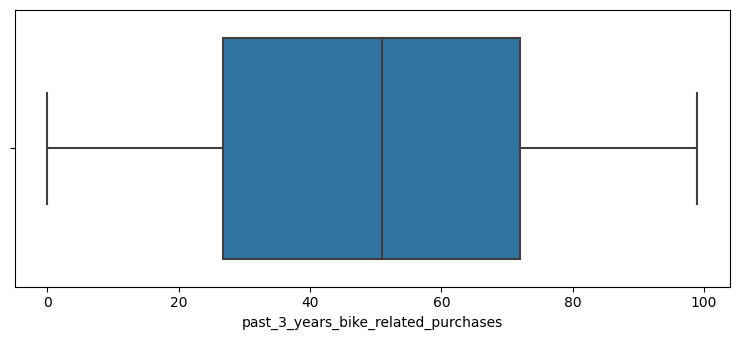

In [9]:
sns.boxplot(x=NewCustomerList_df['past_3_years_bike_related_purchases'])

<Axes: xlabel='tenure'>

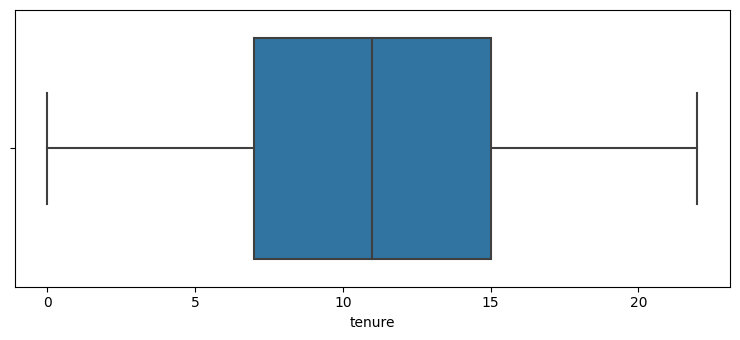

In [10]:
sns.boxplot(x=NewCustomerList_df['tenure'])

<Axes: xlabel='property_valuation'>

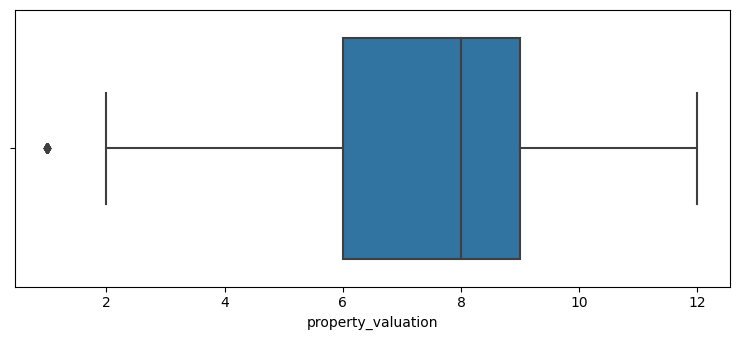

In [11]:
sns.boxplot(x=NewCustomerList_df['property_valuation'])

<Axes: xlabel='Rank'>

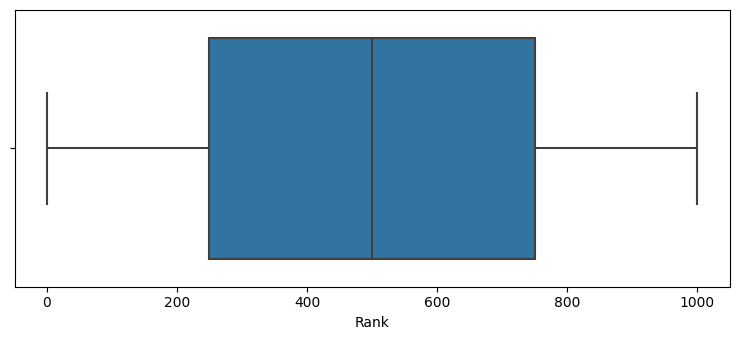

In [12]:
sns.boxplot(x=NewCustomerList_df['Rank'])

<Axes: xlabel='Value'>

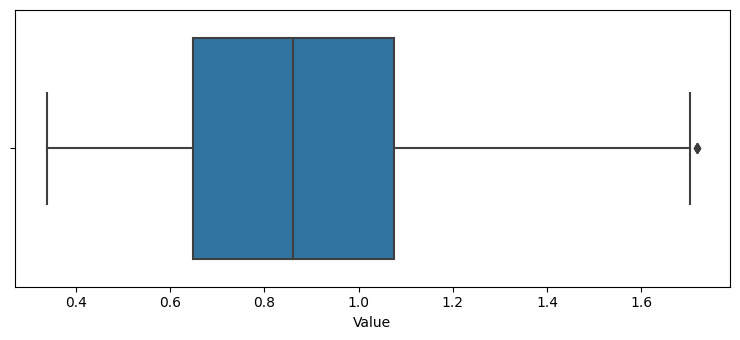

In [13]:
sns.boxplot(x=NewCustomerList_df['Value'])

In [14]:
outliers =np.abs(NewCustomerList_df['DOB'] - NewCustomerList_df['DOB'].mean()) > 1.5*NewCustomerList_df['DOB'].std()
print(outliers)

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996     True
997    False
998    False
999    False
Name: DOB, Length: 1000, dtype: bool


In [15]:
NewCustomerList_df['Date'] = pd.to_datetime(NewCustomerList_df['DOB'])
NewCustomerList_df['Year'] = NewCustomerList_df['Date'].dt.year
NewCustomerList_df['Month'] = NewCustomerList_df['Date'].dt.month
NewCustomerList_df['Day']  = NewCustomerList_df['Date'].dt.day

In [16]:
NewCustomerList_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,Date,Year,Month,Day
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,1.2375,1.546875,1.314844,1,1,1.718750,1957-07-12,1957.0,7.0,12.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,0.6700,0.837500,0.711875,1,1,1.718750,1970-03-22,1970.0,3.0,22.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,0.7700,0.770000,0.770000,1,1,1.718750,1974-08-28,1974.0,8.0,28.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,1.3500,1.350000,1.350000,4,4,1.703125,1979-01-28,1979.0,1.0,28.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,0.6700,0.837500,0.837500,4,4,1.703125,1965-09-21,1965.0,9.0,21.0


In [17]:
Customer_Demographic_df = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final (1).xlsx', sheet_name='CustomerDemographic')
Customer_Demographic_df.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [18]:
Customer_Demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [19]:
Customer_Demographic_df['Date'] = pd.to_datetime(Customer_Demographic_df['DOB'])
Customer_Demographic_df['Year'] = Customer_Demographic_df['Date'].dt.year
Customer_Demographic_df['Month'] = Customer_Demographic_df['Date'].dt.month
Customer_Demographic_df['Day']  = Customer_Demographic_df['Date'].dt.day

<Axes: xlabel='tenure'>

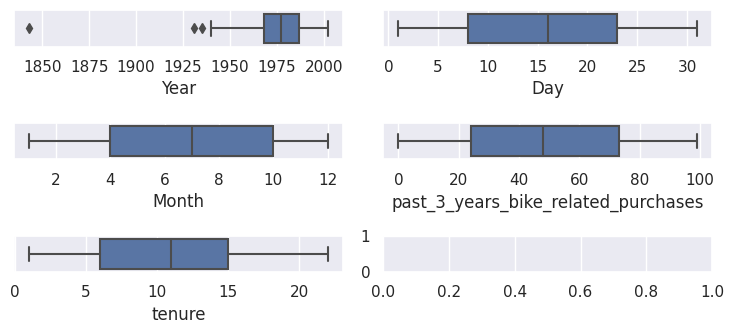

In [20]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 3 columns)
fig, axes = plt.subplots(3, 2)

#create boxplot in each subplot
sns.boxplot(x=Customer_Demographic_df['Year'], ax=axes[0,0])
sns.boxplot(x=Customer_Demographic_df['Day'], ax=axes[0,1])
sns.boxplot(x=Customer_Demographic_df['Month'], ax=axes[1,0])
sns.boxplot(x=Customer_Demographic_df['past_3_years_bike_related_purchases'], ax=axes[1,1])
sns.boxplot(x=Customer_Demographic_df['tenure'], ax=axes[2,0])

In [21]:
count_of_gender = Customer_Demographic_df['gender'].value_counts()
print(count_of_gender)

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64


In [22]:
count_of_jt = Customer_Demographic_df['job_title'].value_counts()
print(count_of_jt)

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: job_title, Length: 195, dtype: int64


In [23]:
count_of_jc = Customer_Demographic_df['job_industry_category'].value_counts()
print(count_of_jc)

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64


In [24]:
count_of_ws = Customer_Demographic_df['wealth_segment'].value_counts()
print(count_of_ws)

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64


In [25]:
count_of_di = Customer_Demographic_df['deceased_indicator'].value_counts()
print(count_of_di)

N    3998
Y       2
Name: deceased_indicator, dtype: int64


In [26]:
count_of_car = Customer_Demographic_df['owns_car'].value_counts()
print(count_of_car)

Yes    2024
No     1976
Name: owns_car, dtype: int64


In [27]:
Customer_Address_df = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final (1).xlsx', sheet_name='CustomerAddress')
Customer_Address_df.head(5)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


<Axes: xlabel='postcode'>

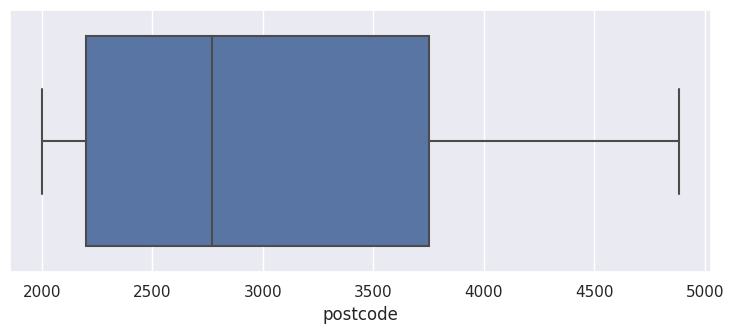

In [28]:
sns.boxplot(x=Customer_Address_df['postcode'])

<Axes: xlabel='property_valuation'>

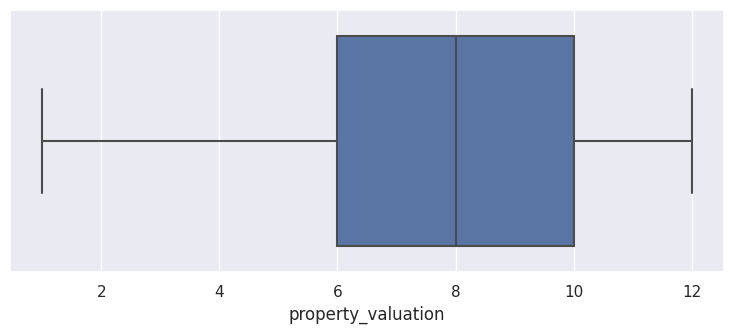

In [29]:
sns.boxplot(x=Customer_Address_df['property_valuation'])

In [30]:
count_of_states = Customer_Address_df['state'].value_counts()
print(count_of_states)

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64


In [31]:
count_of_country = Customer_Address_df['country'].value_counts()
print(count_of_country)

Australia    3999
Name: country, dtype: int64


In [32]:
Customer_Address_df[Customer_Address_df.isna().all(axis=1)]

,customer_id,address,postcode,state,country,property_valuation


In [33]:
Customer_Address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


No missing values here

## Data Cleaning

In [34]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [35]:
transactions_df.dropna(subset = ['online_order', 'brand', 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date'], inplace=True)


In [36]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [39]:
transactions_df["Age"] = 2017 - transactions_df["Year"]

In [41]:
transactions_df.drop(['Age'], axis=1)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Date,Year,Month,Day
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25,2017,2,25
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21,2017,5,21
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16,2017,10,16
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31,2017,8,31
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-24,2017,6,24
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-09,2017,11,9
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-14,2017,4,14
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-03,2017,7,3


In [53]:
#Change the values in the column day of week to actual days for the data to make more sense
transactions_df['Month'].replace({1: 'January', 2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7:'July'}, inplace=True)
  
# print Data frame after replacing the values
transactions_df.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Date,Year,Month,Day,Age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25,2017,February,25,0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21,2017,May,21,0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16,2017,10,16,0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31,2017,8,31,0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017,10,1,0


In [54]:
#Change the values in the column day of week to actual days for the data to make more sense
transactions_df['Month'].replace({7: 'July', 8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December'}, inplace=True)
  
# print Data frame after replacing the values
transactions_df.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Date,Year,Month,Day,Age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25,2017,February,25,0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21,2017,May,21,0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16,2017,October,16,0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31,2017,August,31,0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017,October,1,0


In [61]:
transactions_df['Day_of_Week'] = transactions_df['Date'].dt.day_name()

In [75]:
#Change the values in the column day of week to actual days for the data to make more sense
transactions_df['online_order'].replace({0.0: 'Not Online', 1.0: 'Online'}, inplace=True)
  
# print Data frame after replacing the values
transactions_df.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Date,Year,Month,Day,Age,Day_of_Week
0,1,2,2950,2017-02-25,Not Online,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25,2017,February,25,0,Saturday
1,2,3,3120,2017-05-21,Online,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21,2017,May,21,0,Sunday
2,3,37,402,2017-10-16,Not Online,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16,2017,October,16,0,Monday
3,4,88,3135,2017-08-31,Not Online,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31,2017,August,31,0,Thursday
4,5,78,787,2017-10-01,Online,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017,October,1,0,Sunday


In [76]:
transactions_df.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Date,Year,Month,Day,Age,Day_of_Week
0,1,2,2950,2017-02-25,Not Online,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25,2017,February,25,0,Saturday
1,2,3,3120,2017-05-21,Online,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21,2017,May,21,0,Sunday
2,3,37,402,2017-10-16,Not Online,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16,2017,October,16,0,Monday
3,4,88,3135,2017-08-31,Not Online,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31,2017,August,31,0,Thursday
4,5,78,787,2017-10-01,Online,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017,October,1,0,Sunday


In [77]:
transactions_df.describe()

,transaction_id,product_id,customer_id,list_price,standard_cost,product_first_sold_date,Year,Day,Age
count,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.0,19445.000000,19445.0
mean,9989.257393,45.797737,1739.467267,1107.337193,555.585260,38201.758653,2017.0,15.576035,0.0
std,5779.669087,30.571996,1011.889153,582.662400,405.596541,2878.067854,0.0,8.669729,0.0
min,1.000000,0.000000,1.000000,12.010000,7.210000,33259.000000,2017.0,1.000000,0.0
25%,4976.000000,18.000000,857.000000,575.270000,215.140000,35667.000000,2017.0,8.000000,0.0
50%,9985.000000,45.000000,1741.000000,1163.890000,507.580000,38216.000000,2017.0,16.000000,0.0
75%,14997.000000,72.000000,2615.000000,1635.300000,795.100000,40672.000000,2017.0,23.000000,0.0
max,20000.000000,100.000000,5034.000000,2091.470000,1759.850000,42710.000000,2017.0,31.000000,0.0


## Exploratory Data Analysis
# Univariate Analysis

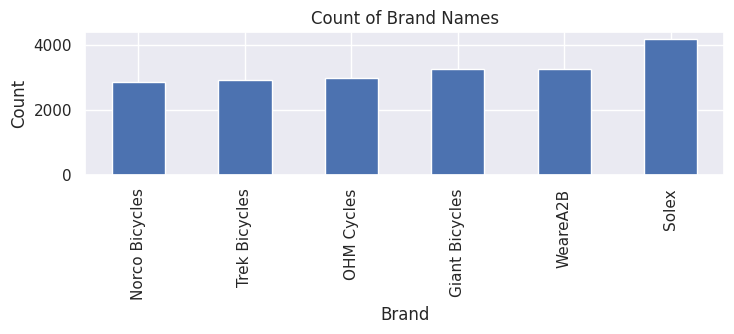

In [49]:
transactions_df['brand'].value_counts().sort_values().plot(kind='bar', xlabel='Brand', ylabel='Count', title='Count of Brand Names');
#solex is the most popular brand name bought 

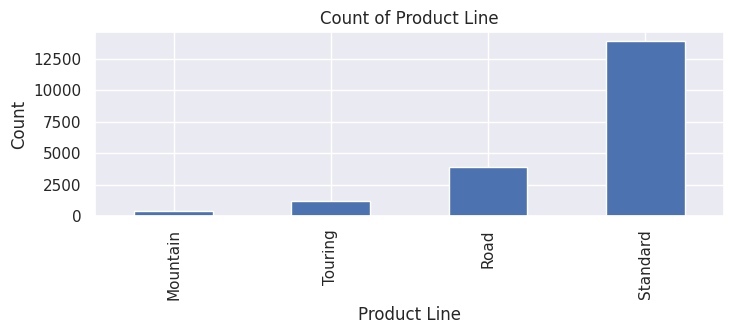

In [50]:
transactions_df['product_line'].value_counts().sort_values().plot(kind='bar', xlabel='Product Line', ylabel='Count', title='Count of Product Line');
#standard is the most popular product line name bought

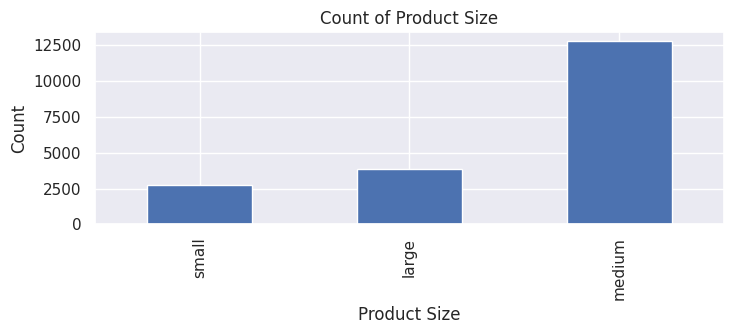

In [51]:
transactions_df['product_size'].value_counts().sort_values().plot(kind='bar', xlabel='Product Size', ylabel='Count', title='Count of Product Size');
#medium is the most popular product size bought

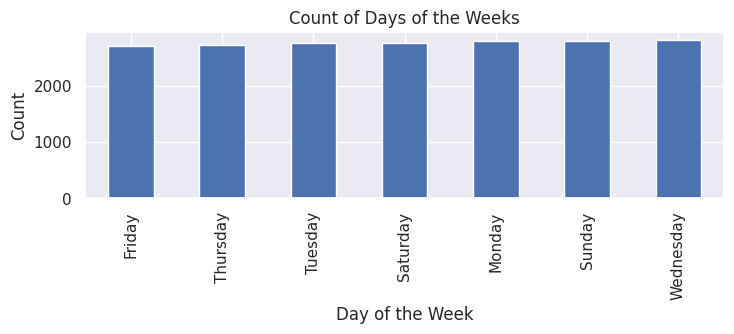

In [67]:
transactions_df['Day_of_Week'].value_counts().sort_values().plot(kind='bar', xlabel='Day of the Week', ylabel='Count', title='Count of Days of the Weeks');

Turns out there's no popular day of the week.

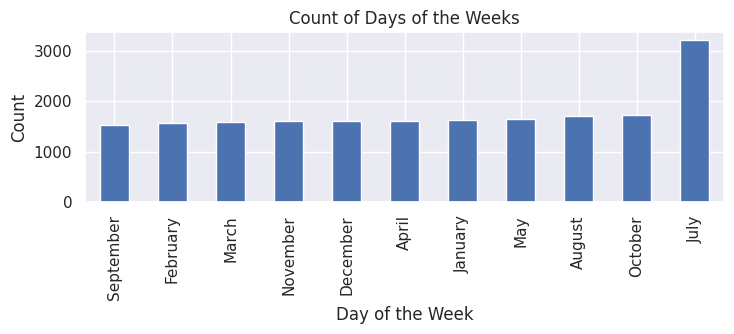

In [68]:
transactions_df['Month'].value_counts().sort_values().plot(kind='bar', xlabel='Day of the Week', ylabel='Count', title='Count of Days of the Weeks');

July seems to be much more popular than other months. This should be investigated accordingly. 

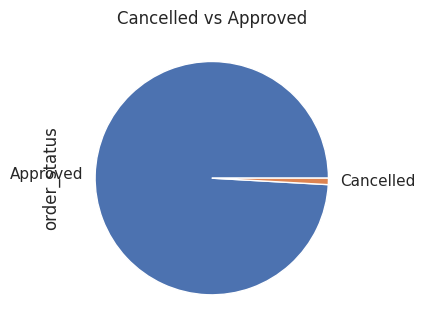

In [74]:
#Months_of_the_Year.sort_values('Month',).plot(kind='bar'
transactions_df['order_status'].value_counts().plot(kind='pie', title='Cancelled vs Approved');

The number of cancelled orders is very small

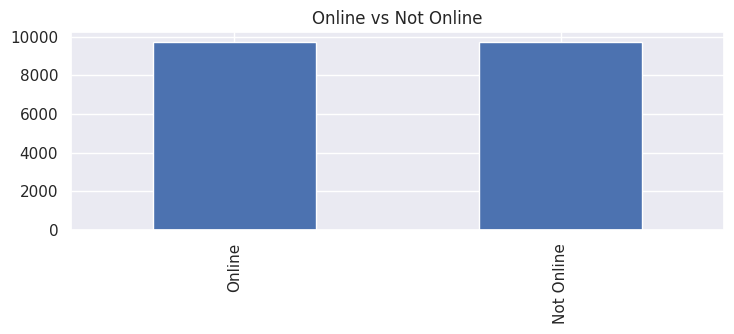

In [80]:
transactions_df['online_order'].value_counts().plot(kind='bar', title='Online vs Not Online');

There is an almost equal distribution between Online and offline transactions

In [120]:
Customer_Demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [123]:
#lets drop the last name column
for col in Customer_Demo_df.columns:
    if 'last_name' in col:
        del Customer_Demo_df[col]
  
Customer_Demo_df.head(5)

,customer_id,first_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [124]:
Customer_Demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   job_title                            3494 non-null   object        
 6   job_industry_category                3344 non-null   object        
 7   wealth_segment                       4000 non-null   object        
 8   deceased_indicator                   4000 non-null   object        
 9   default                              3698 non-null   object        
 10  owns_car    

In [127]:
#separate dates in order to calculate age
Customer_Demo_df['Date'] = pd.to_datetime(Customer_Demo_df['DOB'])
Customer_Demo_df['Year'] = Customer_Demo_df['Date'].dt.year
Customer_Demo_df['Month'] = Customer_Demo_df['Date'].dt.month
Customer_Demo_df['Day']  = Customer_Demo_df['Date'].dt.day

In [128]:
Customer_Demo_df["Age"] = 2017 - Customer_Demo_df["Year"]

In [129]:
Customer_Demo_df.head(5)

,customer_id,first_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Date,Year,Month,Day,Age
0,1,Laraine,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,1953-10-12,1953.0,10.0,12.0,64.0
1,2,Eli,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,1980-12-16,1980.0,12.0,16.0,37.0
2,3,Arlin,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,1954-01-20,1954.0,1.0,20.0,63.0
3,4,Talbot,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,1961-10-03,1961.0,10.0,3.0,56.0
4,5,Sheila-kathryn,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,1977-05-13,1977.0,5.0,13.0,40.0


In [130]:
#lets drop the last name column
for col in Customer_Demo_df.columns:
    if 'default' in col:
        del Customer_Demo_df[col]
  
Customer_Demo_df.head(5)

,customer_id,first_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Date,Year,Month,Day,Age
0,1,Laraine,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953-10-12,1953.0,10.0,12.0,64.0
1,2,Eli,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980-12-16,1980.0,12.0,16.0,37.0
2,3,Arlin,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954-01-20,1954.0,1.0,20.0,63.0
3,4,Talbot,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,1961-10-03,1961.0,10.0,3.0,56.0
4,5,Sheila-kathryn,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,1977-05-13,1977.0,5.0,13.0,40.0


In [131]:
Customer_Demo_df['gender'].replace({'F': 'Female', 'Femal': 'Female', 'M': 'Male'}, inplace=True)
Customer_Demo_df.head(5)

,customer_id,first_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Date,Year,Month,Day,Age
0,1,Laraine,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953-10-12,1953.0,10.0,12.0,64.0
1,2,Eli,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980-12-16,1980.0,12.0,16.0,37.0
2,3,Arlin,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954-01-20,1954.0,1.0,20.0,63.0
3,4,Talbot,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,1961-10-03,1961.0,10.0,3.0,56.0
4,5,Sheila-kathryn,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,1977-05-13,1977.0,5.0,13.0,40.0


In [132]:
Customer_Demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   job_title                            3494 non-null   object        
 6   job_industry_category                3344 non-null   object        
 7   wealth_segment                       4000 non-null   object        
 8   deceased_indicator                   4000 non-null   object        
 9   owns_car                             4000 non-null   object        
 10  tenure      

In [133]:
Customer_Demo_df.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,Year,Month,Day,Age
count,4000.000000,4000.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000
mean,2000.500000,48.890000,10.657041,1977.030667,6.522872,15.764631,39.969333
std,1154.844867,28.715005,5.660146,12.796387,3.462707,8.779365,12.796387
min,1.000000,0.000000,1.000000,1843.000000,1.000000,1.000000,15.000000
25%,1000.750000,24.000000,6.000000,1968.000000,4.000000,8.000000,30.000000
50%,2000.500000,48.000000,11.000000,1977.000000,7.000000,16.000000,40.000000
75%,3000.250000,73.000000,15.000000,1987.000000,10.000000,23.000000,49.000000
max,4000.000000,99.000000,22.000000,2002.000000,12.000000,31.000000,174.000000


In [134]:
#fill the age column with 39 which is the mean 
Customer_Demo_df['Age'].fillna(value=39, inplace=True)

In [135]:
Customer_Demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   job_title                            3494 non-null   object        
 6   job_industry_category                3344 non-null   object        
 7   wealth_segment                       4000 non-null   object        
 8   deceased_indicator                   4000 non-null   object        
 9   owns_car                             4000 non-null   object        
 10  tenure      

In [136]:
#fill null values in industry with manufacturing
Customer_Demo_df['job_industry_category'].fillna(value='manufacturing', inplace=True)

In [137]:
Customer_Demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   job_title                            3494 non-null   object        
 6   job_industry_category                4000 non-null   object        
 7   wealth_segment                       4000 non-null   object        
 8   deceased_indicator                   4000 non-null   object        
 9   owns_car                             4000 non-null   object        
 10  tenure      

In [138]:
#fill tenure with the mean
Customer_Demo_df['tenure'].fillna(value=10, inplace=True)

In [139]:
Customer_Demo_df.head()

,customer_id,first_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Date,Year,Month,Day,Age
0,1,Laraine,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953-10-12,1953.0,10.0,12.0,64.0
1,2,Eli,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980-12-16,1980.0,12.0,16.0,37.0
2,3,Arlin,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954-01-20,1954.0,1.0,20.0,63.0
3,4,Talbot,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,1961-10-03,1961.0,10.0,3.0,56.0
4,5,Sheila-kathryn,Female,56,1977-05-13,Senior Editor,manufacturing,Affluent Customer,N,Yes,8.0,1977-05-13,1977.0,5.0,13.0,40.0


In [141]:
Customer_Demo_df.drop(['job_title', 'DOB', 'Date', 'Year', 'Month', 'Day'], axis=1, inplace=True)

In [142]:
Customer_Demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   gender                               4000 non-null   object 
 3   past_3_years_bike_related_purchases  4000 non-null   int64  
 4   job_industry_category                4000 non-null   object 
 5   wealth_segment                       4000 non-null   object 
 6   deceased_indicator                   4000 non-null   object 
 7   owns_car                             4000 non-null   object 
 8   tenure                               4000 non-null   float64
 9   Age                                  4000 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 312.6+ KB


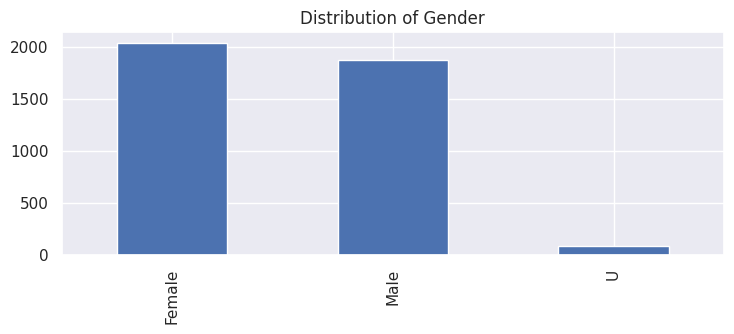

In [143]:
Customer_Demo_df['gender'].value_counts().plot(kind='bar', title='Distribution of Gender');

There are slightly more females than males

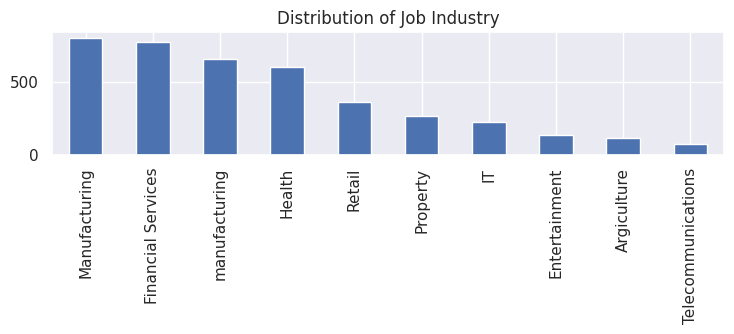

In [144]:
Customer_Demo_df['job_industry_category'].value_counts().plot(kind='bar', title='Distribution of Job Industry');